In [3]:
import nilearn.decomposition
import functions
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

import functions
import hosd_python.hosd as hos
import interactive_analysis

In [5]:
no_ica_chans = 18
span = 5
offset = 100 
fs=1000
ms2s = lambda x, _:f'{x/1000:g}' 

In [6]:

data = functions.array_from_TDMSgroup("patients/P045/P045_S01_D2024-04-25_G36.tdms", "R002")
filtered_data = functions.butter_filter(data)

In [7]:
components = functions.FASTICA(filtered_data[5000:, :], no_ica_chans)

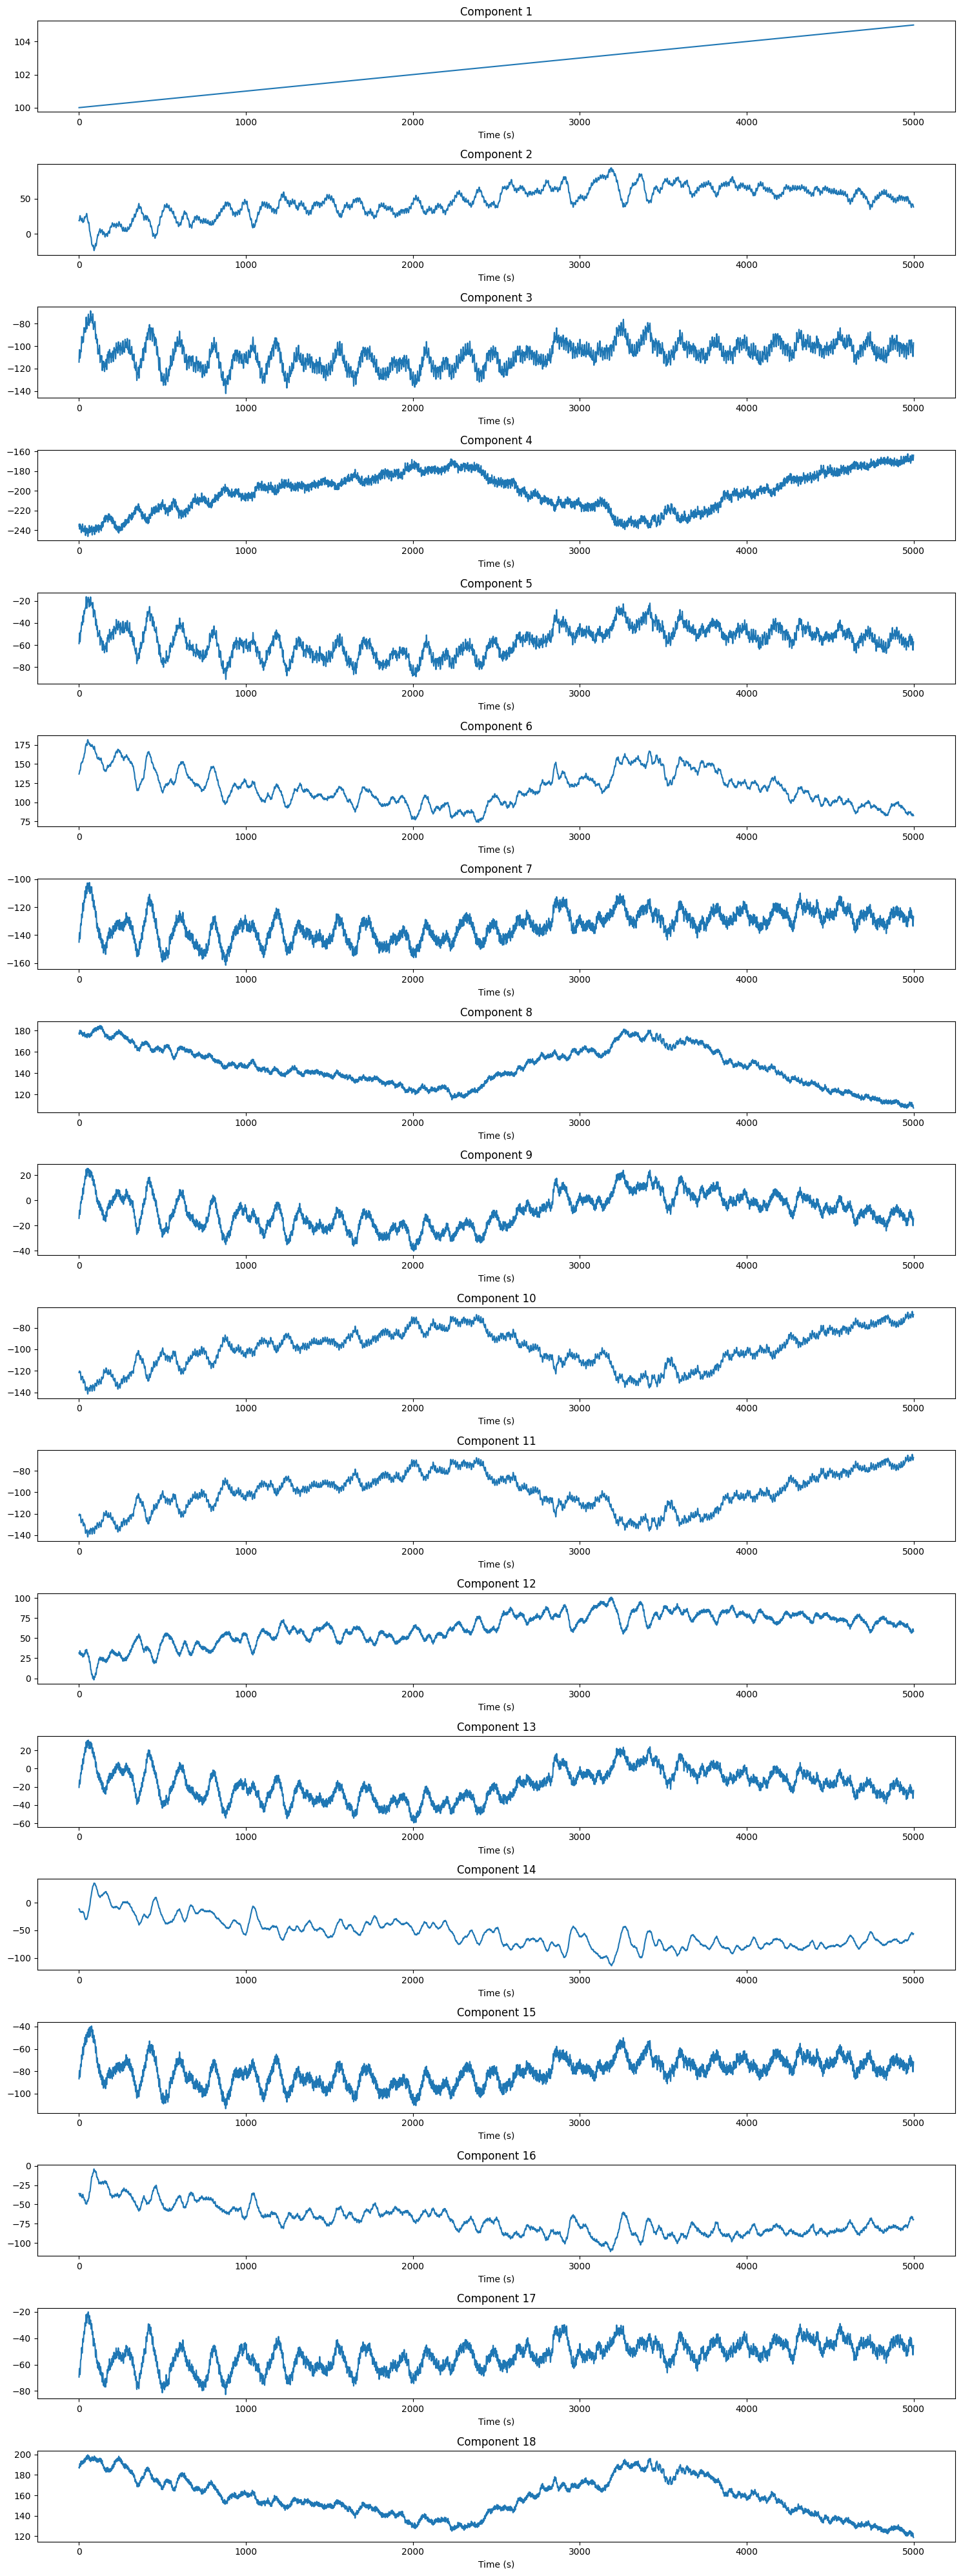

In [8]:
plt.figure(figsize=(15, 40))  # Adjust the size as needed

    # Loop over each component
for i in range(components.shape[1]):  # 
    plt.subplot(no_ica_chans, 1, i + 1)  # Adjust subplot grid to 6x6, or another grid that fits 32 plots
    plt.plot(data[offset*fs:(offset+span)*fs][:, i])  # Plotting the i-th component
    plt.title(f'Component {i+1}')
    plt.xlabel('Time (s)')
    plt.tight_layout()  # Adjust layout to prevent label/title overlap

In [13]:
filtered_data[offset * fs:fs * (offset + span), :].shape

(5000, 33)